In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/5G_energy_consumption_dataset.csv')
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [4]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=236c33b15865fa52c0caae19d76fde2484bb5792fe4aeaeb74c263d7adc05aed
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
df = pd.read_csv('/content/5G_energy_consumption_dataset.csv')
df.head()
from ydata_profiling import ProfileReport

data = pd.read_csv('/content/5G_energy_consumption_dataset.csv')

profile = ProfileReport(df, title='Pandas Profiling Report for Tunisair Flight')


profile.to_notebook_iframe()

profile.to_file("your_report_name.html")

Output hidden; open in https://colab.research.google.com to view.

In [6]:
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

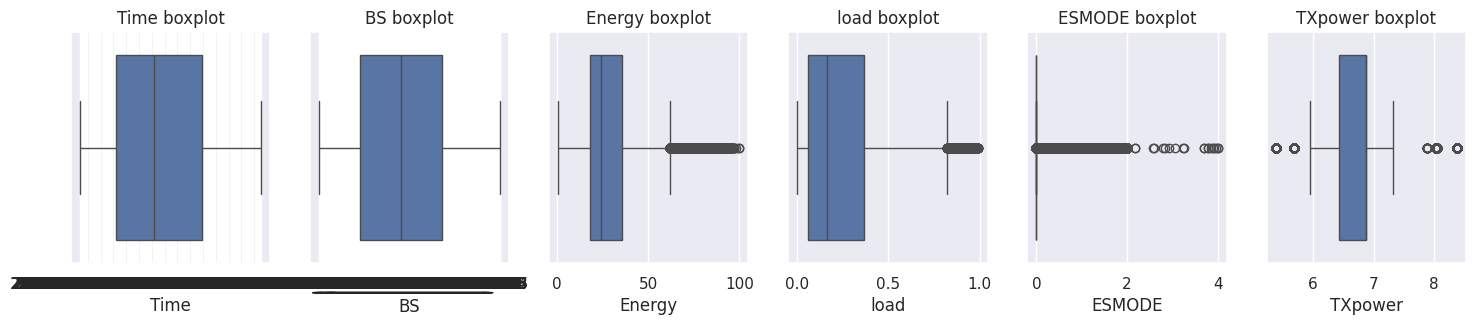

In [7]:
# ------------ CHECKING FOR OUTLIERS -------------------
def outlierChecker(df, a,b,c,d,e,f):
    plt.figure(figsize = (18, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 6, 1)
    sns.boxplot(x = df[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1, 6, 2)
    sns.boxplot(x = df[b])
    plt.title(f"{b} boxplot")

    plt.subplot(1, 6, 3)
    sns.boxplot(x = df[c])
    plt.title(f"{c} boxplot")

    plt.subplot(1, 6, 4)
    sns.boxplot(x = df[d])
    plt.title(f"{d} boxplot")

    plt.subplot(1, 6, 5)
    sns.boxplot(x = df[e])
    plt.title(f"{e} boxplot")

    plt.subplot(1, 6, 6)
    sns.boxplot(x = df[f])
    plt.title(f"{f} boxplot")

outlierChecker(df, 'Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower')

In [8]:
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [9]:
num = pd.DataFrame(data={"column_name": ['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower']})

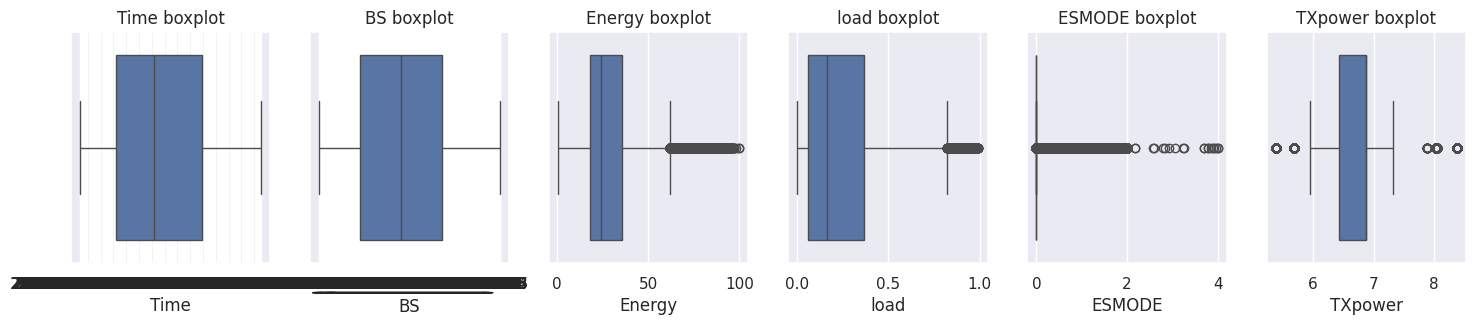

In [10]:
for i in df.columns:
    if i in num.columns:
        Q1 = df[i].describe()[4]
        Q3 = df[i].describe()[6]
        IQR = Q3 - Q1
        min_threshold = (Q1 - 1.5 * IQR)
        max_threshold = (Q3 + 1.5 * IQR)

        df = df.loc[(df[i] > min_threshold) & (df[i] < max_threshold)]

outlierChecker(df, 'Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower')

In [11]:
df['BS'].unique()

array(['B_0', 'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8',
       'B_9', 'B_10', 'B_11', 'B_12', 'B_14', 'B_15', 'B_16', 'B_17',
       'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25',
       'B_26', 'B_27', 'B_28', 'B_29', 'B_30', 'B_31', 'B_32', 'B_33',
       'B_34', 'B_35', 'B_36', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41',
       'B_42', 'B_43', 'B_44', 'B_45', 'B_46', 'B_47', 'B_48', 'B_49',
       'B_50', 'B_51', 'B_52', 'B_53', 'B_54', 'B_55', 'B_56', 'B_57',
       'B_58', 'B_59', 'B_60', 'B_61', 'B_62', 'B_63', 'B_64', 'B_65',
       'B_66', 'B_67', 'B_68', 'B_69', 'B_70', 'B_71', 'B_72', 'B_73',
       'B_74', 'B_75', 'B_76', 'B_77', 'B_78', 'B_79', 'B_80', 'B_81',
       'B_82', 'B_83', 'B_84', 'B_85', 'B_86', 'B_87', 'B_88', 'B_89',
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97',
       'B_98', 'B_99', 'B_100', 'B_101', 'B_102', 'B_103', 'B_104',
       'B_105', 'B_106', 'B_107', 'B_108', 'B_109', 'B_110', 'B_111',
       'B_11

In [12]:
df['BS'].dtypes

dtype('O')

In [13]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
df['BS'] = Label_encoder.fit_transform(df['BS'])

In [14]:
df['Time'] = Label_encoder.fit_transform(df['Time'])

In [15]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,0,0,64.275037,0.487936,0.0,7.101719
1,1,0,55.904335,0.344468,0.0,7.101719
2,2,0,57.698057,0.193766,0.0,7.101719
3,3,0,55.156951,0.222383,0.0,7.101719
4,4,0,56.053812,0.175436,0.0,7.101719


In [17]:
df.dtypes

Time         int64
BS           int64
Energy     float64
load       float64
ESMODE     float64
TXpower    float64
dtype: object

Text(0.5, 1.0, 'Linear Regression btw all Variables')

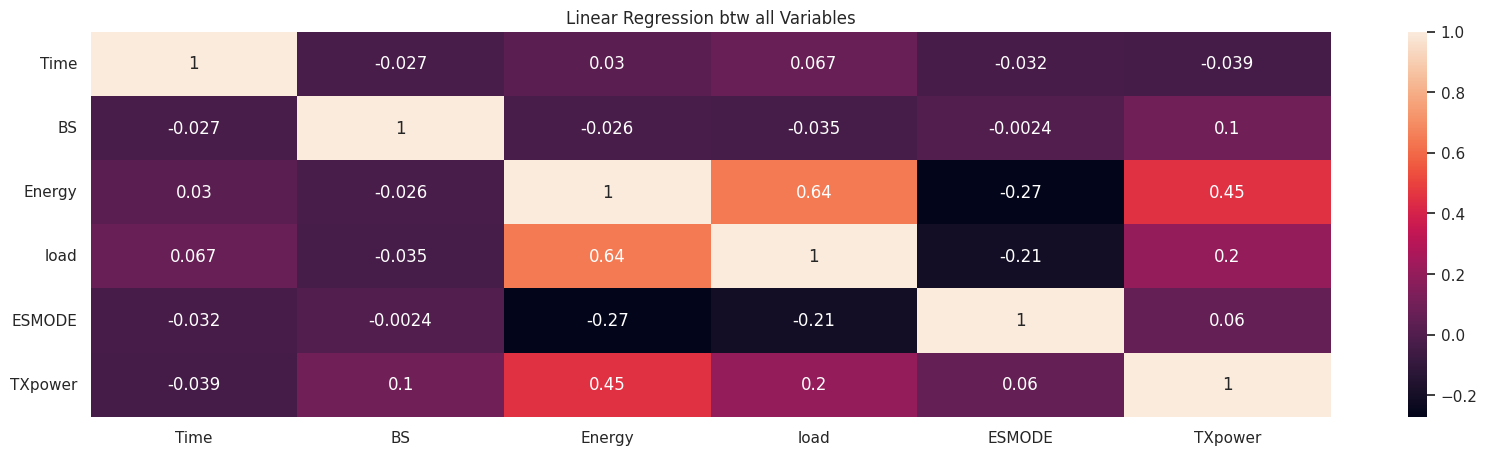

In [18]:
plt.figure(figsize= (20, 5))
sns.heatmap(df.corr(), annot = True)
plt.title('Linear Regression btw all Variables')

In [19]:
def plotter(df, a, b, c, d, e, dep_var):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 4))

    plt.subplot(1, 5, 1)
    sns.regplot(x = df[a], y = df[dep_var], ci = 0)
    plt.title(f"Relationship Btw {a} and {dep_var} is: {df[a].corr(df[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 5, 2)
    sns.regplot(x = df[b], y = df[dep_var], ci = 0)
    plt.title(f"Relationship Btw {b} and {dep_var} is: {df[b].corr(df[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 5, 3)
    sns.regplot(x = df[c], y = df[dep_var], ci = 0)
    plt.title(f"Relationship Btw {c} and {dep_var} is: {df[c].corr(df[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 5, 4)
    sns.regplot(x = df[d], y = df[dep_var], ci = 0)
    plt.title(f"Relationship Btw {d} and {dep_var} is: {df[d].corr(df[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 5, 5)
    sns.regplot(x = df[e], y = df[dep_var], ci = 0)
    plt.title(f"Relationship Btw {e} and {dep_var} is: {df[e].corr(df[dep_var]).round(2)}")
    plt.grid(False)

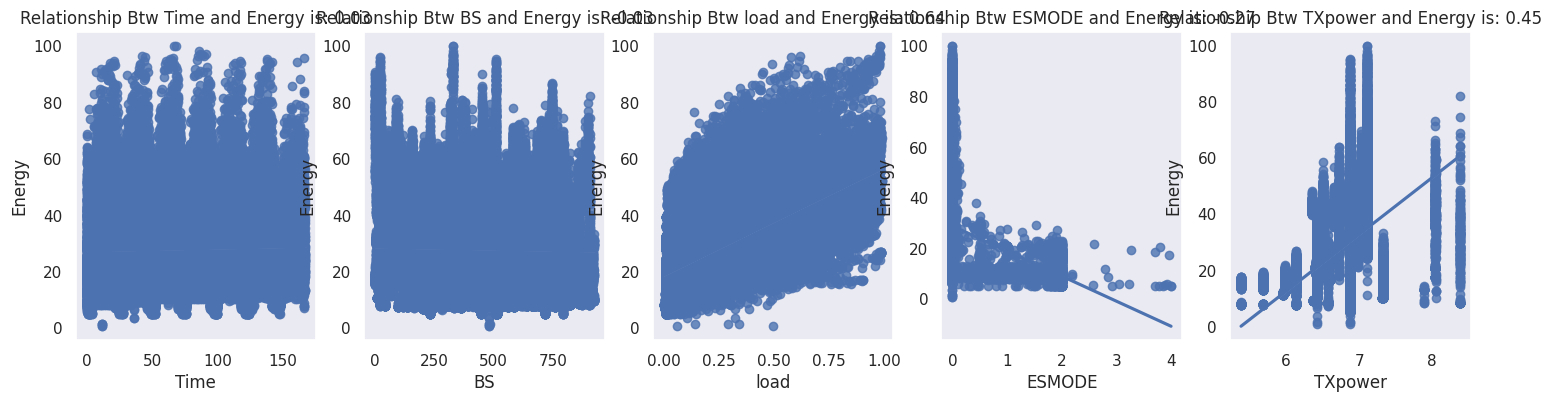

In [20]:
plotter(df, 'Time', 'BS', 'load', 'ESMODE', 'TXpower', 'Energy')

In [21]:
df.describe()

,Time,BS,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000,92629.000000,92629.000000
mean,71.522590,423.585907,28.138997,0.244705,0.081361,6.765427
std,44.321303,244.022127,13.934645,0.234677,0.382317,0.309929
min,0.000000,0.000000,0.747384,0.000000,0.000000,5.381166
25%,34.000000,213.000000,18.236173,0.057370,0.000000,6.427504
50%,67.000000,423.000000,24.065770,0.165550,0.000000,6.875934
75%,109.000000,629.000000,35.724963,0.363766,0.000000,6.875934
max,167.000000,922.000000,100.000000,0.993957,4.000000,8.375336


In [23]:
from sklearn.model_selection import train_test_split
x = df.drop('Energy', axis = 1)
y = df['Energy']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [25]:
cross_validation = rf_model.predict(xtrain)
score = r2_score(cross_validation, ytrain).round(2)
print (f'The Model is {(score) * 100}% accurate')
if score > 0.75:
    print('Model did not underfit')
else:
    print('Model is underfitted')

The Model is 99.0% accurate
Model did not underfit


In [26]:
prediction = rf_model.predict(xtest)
score = r2_score(prediction, ytest).round(2)
print(f'The Model is {(score * 100)}% accurate')
if score > 0.75:
    print('The Model did not overfit')
else:
    print('Model Overfitted')

The Model is 95.0% accurate
The Model did not overfit


In [27]:
coeff = rf_model.coef_
intercept = rf_model.intercepts_

print(f'Model Coeficients: {coeff}\nModel Intercept: {intercept}')

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'